In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data

In [88]:
ufc = pd.read_csv("ufc_data.csv")
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [89]:
ufc.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     6012 non-null   object 
 1   B_fighter                     6012 non-null   object 
 2   Referee                       5980 non-null   object 
 3   date                          6012 non-null   object 
 4   location                      6012 non-null   object 
 5   Winner                        6012 non-null   object 
 6   title_bout                    6012 non-null   bool   
 7   weight_class                  6012 non-null   object 
 8   B_avg_KD                      4585 non-null   float64
 9   B_avg_opp_KD                  4585 non-null   float64
 10  B_avg_SIG_STR_pct             4585 non-null   float64
 11  B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12  B_avg_TD_pct                  4585 non-null   float64
 13  B_

In [90]:
ufc.shape

(6012, 144)

# Exploratory Data Analysis

## Dependent variable

<AxesSubplot:xlabel='Winner', ylabel='count'>

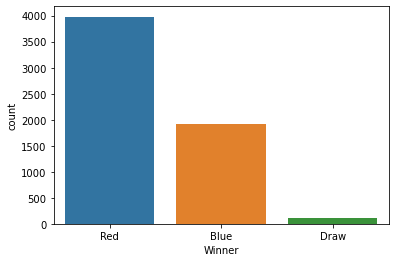

In [91]:
sns.countplot(x = "Winner", data = ufc)

In [92]:
ufc["Winner"].value_counts(normalize = True)

Red     0.661843
Blue    0.319860
Draw    0.018297
Name: Winner, dtype: float64

In [93]:
mask = ufc["Winner"] != "Draw"
ufc = ufc[mask]
ufc.shape

(5902, 144)

## Dupes and missings

In [94]:
ufc.duplicated().sum() # no dupes

0

In [95]:
perc_missing = ufc.isnull().sum() / len(ufc)
perc_missing.sort_values(ascending = False).head(50)

B_avg_DISTANCE_att              0.236361
B_avg_BODY_landed               0.236361
B_avg_GROUND_landed             0.236361
B_avg_opp_GROUND_att            0.236361
B_avg_CTRL_time(seconds)        0.236361
B_avg_opp_CTRL_time(seconds)    0.236361
B_total_time_fought(seconds)    0.236361
B_avg_opp_LEG_att               0.236361
B_avg_LEG_landed                0.236361
B_avg_LEG_att                   0.236361
B_avg_opp_BODY_landed           0.236361
B_avg_opp_BODY_att              0.236361
B_avg_BODY_att                  0.236361
B_avg_opp_CLINCH_landed         0.236361
B_avg_opp_HEAD_landed           0.236361
B_avg_opp_HEAD_att              0.236361
B_avg_HEAD_landed               0.236361
B_avg_HEAD_att                  0.236361
B_avg_opp_TD_landed             0.236361
B_avg_opp_TD_att                0.236361
B_avg_TD_landed                 0.236361
B_avg_TD_att                    0.236361
B_avg_opp_TOTAL_STR_landed      0.236361
B_avg_opp_LEG_landed            0.236361
B_avg_GROUND_att

### Do average missing value rows have any previous fights?

In [96]:
ufc[ufc["B_avg_DISTANCE_att"].isnull()]["B_wins"].sum()

0

In [97]:
ufc[ufc["B_avg_DISTANCE_att"].isnull()]["B_losses"].sum()

0

In [98]:
ufc[ufc["R_avg_DISTANCE_att"].isnull()]["R_wins"].sum()

0

In [99]:
ufc[ufc["R_avg_DISTANCE_att"].isnull()]["R_losses"].sum()

0

In [100]:
# NULLs for averages belong to fighters who are fighting without a record

### Replace NULLs for average columns with favorite/underdog median

In [101]:
avg_cols = [col for col in ufc.columns if "avg" in col]

ufc[avg_cols] = ufc[avg_cols].fillna(ufc[avg_cols].median())

In [102]:
ufc[["B_total_time_fought(seconds)", "R_total_time_fought(seconds)"]] = ufc[["B_total_time_fought(seconds)", "R_total_time_fought(seconds)"]].fillna(ufc[["B_total_time_fought(seconds)", "R_total_time_fought(seconds)"]].median())

In [103]:
ufc.isna().sum().sort_values(ascending = False).head(20)

B_Reach_cms                  874
R_Reach_cms                  397
B_age                        170
R_age                         62
B_Stance                      61
Referee                       31
R_Stance                      29
B_Height_cms                  10
B_Weight_lbs                   8
R_Height_cms                   4
R_Weight_lbs                   2
B_avg_DISTANCE_landed          0
B_avg_opp_CLINCH_att           0
B_avg_CLINCH_landed            0
B_avg_CLINCH_att               0
B_avg_opp_DISTANCE_landed      0
B_avg_opp_DISTANCE_att         0
B_avg_opp_LEG_att              0
B_avg_DISTANCE_att             0
B_avg_opp_LEG_landed           0
dtype: int64

In [104]:
## Too many missing reach, dropping column
ufc = ufc.drop(columns=["B_Reach_cms", "R_Reach_cms", "Referee"])
ufc.isna().sum().sort_values(ascending = False).head(10)

B_age                      170
R_age                       62
B_Stance                    61
R_Stance                    29
B_Height_cms                10
B_Weight_lbs                 8
R_Height_cms                 4
R_Weight_lbs                 2
B_avg_opp_DISTANCE_att       0
B_avg_opp_CLINCH_landed      0
dtype: int64

In [105]:
cols = ["B_age", "R_age", "B_Height_cms", "B_Weight_lbs", "R_Height_cms", "R_Weight_lbs"]

ufc[cols] = ufc[cols].fillna(ufc[cols].median())
ufc.isna().sum().sort_values(ascending = False).head(5)

B_Stance                   61
R_Stance                   29
B_avg_opp_DISTANCE_att      0
B_avg_GROUND_att            0
B_avg_opp_CLINCH_landed     0
dtype: int64

In [106]:
ufc['R_Stance'] = ufc['R_Stance'].fillna(ufc['R_Stance'].mode()[0])
ufc['B_Stance'] = ufc['B_Stance'].fillna(ufc['B_Stance'].mode()[0])
ufc.isna().sum().sort_values(ascending = False).head(5)

R_age                      0
B_avg_opp_DISTANCE_att     0
B_avg_GROUND_att           0
B_avg_opp_CLINCH_landed    0
B_avg_opp_CLINCH_att       0
dtype: int64

In [107]:
ufc.shape

(5902, 141)

## Data Type Boolean

In [108]:
ufc.select_dtypes(include = "boolean").columns.tolist()

['title_bout']

In [109]:
ufc["title_bout"].value_counts(normalize = True)

False    0.939004
True     0.060996
Name: title_bout, dtype: float64

## Data Type Object

In [110]:
ufc.select_dtypes(include = "object").columns.tolist()

['R_fighter',
 'B_fighter',
 'date',
 'location',
 'Winner',
 'weight_class',
 'B_Stance',
 'R_Stance']

In [111]:
ufc["location"] = ufc["location"].astype("category")
ufc["Winner"] = ufc["Winner"].astype("category")
ufc["weight_class"] = ufc["weight_class"].astype("category")
ufc["B_Stance"] = ufc["B_Stance"].astype("category")
ufc["R_Stance"] = ufc["R_Stance"].astype("category")

ufc["date"] = pd.to_datetime(ufc["date"])

In [112]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 6011
Columns: 141 entries, R_fighter to R_age
dtypes: bool(1), category(5), datetime64[ns](1), float64(104), int64(28), object(2)
memory usage: 6.2+ MB


In [113]:
ufc["location"].nunique()

166

In [114]:
ufc.value_counts("location").head(10)

location
Las Vegas, Nevada, USA                        1535
Abu Dhabi, Abu Dhabi, United Arab Emirates     153
London, England, United Kingdom                111
Newark, New Jersey, USA                         88
Anaheim, California, USA                        82
Montreal, Quebec, Canada                        80
Chicago, Illinois, USA                          79
Atlantic City, New Jersey, USA                  78
Los Angeles, California, USA                    75
Toronto, Ontario, Canada                        74
dtype: int64

In [115]:
ufc = ufc.drop(columns=["location"])

In [116]:
ufc["weight_class"].nunique()

14

<AxesSubplot:xlabel='weight_class', ylabel='count'>

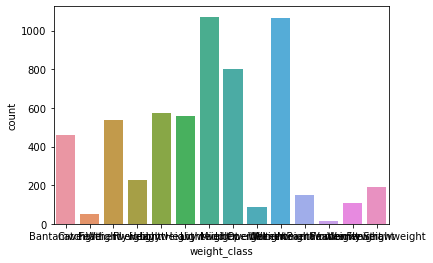

In [117]:
sns.countplot(x = "weight_class", data = ufc)

In [118]:
ufc.value_counts("weight_class")

weight_class
Lightweight           1072
Welterweight          1066
Middleweight           803
Heavyweight            573
LightHeavyweight       559
Featherweight          539
Bantamweight           462
Flyweight              226
WomenStrawweight       190
WomenBantamweight      149
WomenFlyweight         110
OpenWeight              86
CatchWeight             51
WomenFeatherweight      16
dtype: int64

In [119]:
# Dropping womens fights
mask = ufc["weight_class"].str.contains("Women")
ufc = ufc[~mask]
ufc.value_counts("weight_class")

weight_class
Lightweight           1072
Welterweight          1066
Middleweight           803
Heavyweight            573
LightHeavyweight       559
Featherweight          539
Bantamweight           462
Flyweight              226
OpenWeight              86
CatchWeight             51
WomenStrawweight         0
WomenFlyweight           0
WomenFeatherweight       0
WomenBantamweight        0
dtype: int64

## Data Type Float

In [120]:
float_vars = ufc.select_dtypes(include = "float64").columns.tolist()
ufc[float_vars].describe(percentiles = [0.01, 0.99])

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_Height_cms,R_Weight_lbs,B_age,R_age
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,...,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,0.205389,0.142396,0.452516,0.432437,0.280470,0.251437,0.401629,0.344021,0.120415,0.107817,...,5.699622,6.514734,4.338960,138.429307,118.051417,628.436480,180.106882,174.587088,29.286739,29.596285
std,0.355095,0.301369,0.115360,0.117454,0.237985,0.234217,0.647317,0.590690,0.307365,0.286149,...,6.650066,8.400879,5.625881,130.113652,114.439233,251.562384,8.135339,34.423626,4.020184,4.144840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,157.480000,125.000000,18.000000,19.000000
1%,0.000000,0.000000,0.126053,0.131800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,60.360000,162.560000,125.000000,21.000000,21.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.149902,0.118317,0.000000,0.000000,...,3.724670,4.000000,2.641602,105.036075,89.000000,655.562500,180.340000,170.000000,29.000000,29.000000
99%,1.489453,1.250000,0.780000,0.771664,1.000000,1.000000,3.000000,3.000000,1.415000,1.250000,...,31.810938,39.817017,27.341274,584.920000,544.666635,1274.978622,198.120000,265.000000,40.000000,40.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,3.000000,...,68.000000,104.000000,68.000000,996.749573,812.000000,1500.000000,210.820000,345.000000,51.000000,47.000000


## Data Type Int

In [121]:
int_vars = ufc.select_dtypes(include = "int").columns.tolist()
ufc[int_vars].describe(percentiles = [0.01, 0.99])

,B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.0,5437.000000,5437.000000,...,5437.000000,5437.000000,5437.000000,5437.0,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,9.580835,0.282877,0.967997,0.392312,1.666728,2.659003,1.562810,0.0,0.017473,0.216848,...,2.367114,3.876954,2.109068,0.0,0.029612,0.302557,1.271473,1.367482,0.822512,0.074674
std,12.057577,1.140186,1.511571,0.660596,1.830879,3.386165,1.960228,0.0,0.132434,0.528673,...,2.120246,3.940196,2.306225,0.0,0.171686,0.625273,1.712037,1.889895,1.391245,0.284400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,...,2.000000,3.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
99%,57.000000,5.000000,7.000000,3.000000,7.000000,15.000000,9.000000,0.0,1.000000,2.000000,...,9.000000,16.000000,10.000000,0.0,1.000000,3.000000,7.640000,8.000000,6.000000,1.000000
max,94.000000,16.000000,16.000000,5.000000,16.000000,23.000000,16.000000,0.0,2.000000,5.000000,...,16.000000,23.000000,17.000000,0.0,2.000000,5.000000,10.000000,11.000000,13.000000,2.000000


In [122]:
# drop draw columns as all rows are 0
ufc = ufc.drop(columns = ["B_draw", "R_draw"])

<AxesSubplot:xlabel='B_total_fights'>

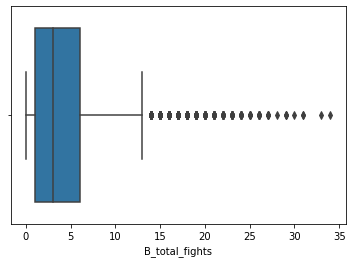

In [123]:
ufc["B_total_fights"] = ufc["B_wins"] + ufc["B_losses"]
sns.boxplot(x = "B_total_fights", data = ufc)

<AxesSubplot:xlabel='R_total_fights'>

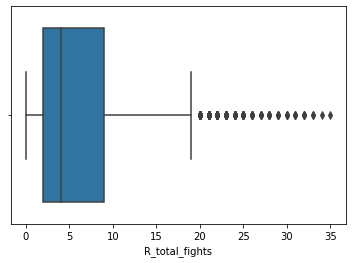

In [124]:
ufc["R_total_fights"] = ufc["R_wins"] + ufc["R_losses"]
sns.boxplot(x = "R_total_fights", data = ufc)

## Finalizing data to train

In [125]:
# what columns are not fighter specific? are there multiple "post" fight columns?
fight_cols = [col for col in ufc.columns if "B_" not in col and "R_" not in col]
fight_cols

['date', 'Winner', 'title_bout', 'weight_class']

In [126]:
# drop columns that will not be used to predict
ufc = ufc.drop(columns = ["B_fighter", "R_fighter", "date"])
ufc.shape

(5437, 137)

In [127]:
ufc.select_dtypes(include = "category").columns.tolist()

['Winner', 'weight_class', 'B_Stance', 'R_Stance']

In [128]:
# prefixes for dummy variables
ufc["B_Stance"] = "B_" + ufc["B_Stance"].astype(str)
ufc["R_Stance"] = "R_" + ufc["R_Stance"].astype(str)

# make sure still category features
ufc["B_Stance"] = ufc["B_Stance"].astype("category")
ufc["R_Stance"] = ufc["R_Stance"].astype("category")

# create dummy variables and create one data frame
df_weight_class = pd.get_dummies(ufc["weight_class"])
df_B_Stance = pd.get_dummies(ufc["B_Stance"])
df_R_Stance = pd.get_dummies(ufc["R_Stance"])

ufc_dummy = pd.concat([ufc, 
           df_weight_class,
           df_B_Stance,
           df_R_Stance], 
          axis = 1).drop(columns = ["weight_class",
                                    "B_Stance",
                                    "R_Stance"])
ufc_dummy.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Open Stance,B_Orthodox,B_Sideways,B_Southpaw,B_Switch,R_Open Stance,R_Orthodox,R_Sideways,R_Southpaw,R_Switch
0,Red,False,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.000,0.450000,0.427500,0.250000,0.200000,0.149902,0.118317,...,0,1,0,0,0,0,0,0,1,0
5,Blue,False,0.000000,0.000,0.515000,0.473750,0.435000,0.250000,1.250000,0.625000,...,0,0,0,0,1,0,1,0,0,0
6,Blue,False,0.046875,0.125,0.459277,0.404687,0.322188,0.068867,0.189453,0.000000,...,0,1,0,0,0,0,1,0,0,0


In [129]:
ufc_dummy.shape

(5437, 158)

# Modeling

## Train & test split

In [130]:
from sklearn.model_selection import train_test_split

X = ufc_dummy.drop("Winner", axis = "columns")
y = ufc_dummy["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777, stratify = y)

In [131]:
y_test.value_counts(normalize = True)

Red     0.68076
Blue    0.31924
Name: Winner, dtype: float64

In [136]:
from sklearn.metrics import log_loss

# copied this function from online that simulates a baseline logloss value to beat

def calculate_log_loss(class_ratio,multi=10000):
    
    if sum(class_ratio)!=1.0:
        print("warning: Sum of ratios should be 1 for best results")
        class_ratio[-1]+=1-sum(class_ratio)  # add the residual to last class's ratio
    
    actuals=[]
    for i,val in enumerate(class_ratio):
        actuals=actuals+[i for x in range(int(val*multi))]
        

    preds=[]
    for i in range(multi):
        preds+=[class_ratio]

    return (log_loss(actuals, preds))

In [137]:
logloss = calculate_log_loss([.319, 0.681], multi = 1000)
logloss

0.6261133867059537

## Random forest

### Initital model

In [138]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 777).fit(X_train, y_train)

In [139]:
y_pred = model.predict_proba(X_train)
log_loss(y_train, y_pred)

0.1679091052892057

In [140]:
y_pred = model.predict_proba(X_test)
log_loss(y_test, y_pred)

# slightly better than baseline, but incredibly overfit

0.5837526999363946

In [141]:
y_pred_class = model.predict(X_test)
y_pred_class

array(['Red', 'Red', 'Red', ..., 'Red', 'Red', 'Red'], dtype=object)

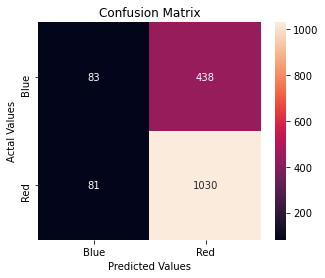

In [144]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)

cm_df = pd.DataFrame(cm,
                     index = ['Blue','Red'], 
                     columns = ['Blue','Red'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = '.4g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# predicting way too many Red

### Tuning

In [145]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [146]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose = 2, random_state = 777, n_jobs = 3)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 20.6min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 48.3min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 59.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=777, verbose=2)

In [147]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [148]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict_proba(X_train)
y_pred

array([[0.80333333, 0.19666667],
       [0.06666667, 0.93333333],
       [0.75166667, 0.24833333],
       ...,
       [0.82833333, 0.17166667],
       [0.125     , 0.875     ],
       [0.15833333, 0.84166667]])

In [149]:
log_loss(y_train, y_pred)

0.16769341741015242

In [150]:
y_pred = best_random.predict_proba(X_test)
y_pred

array([[0.425     , 0.575     ],
       [0.26833333, 0.73166667],
       [0.24      , 0.76      ],
       ...,
       [0.22166667, 0.77833333],
       [0.41833333, 0.58166667],
       [0.15333333, 0.84666667]])

In [151]:
log_loss(y_test, y_pred)

# slightly improved, still overfit

0.5803842503961646

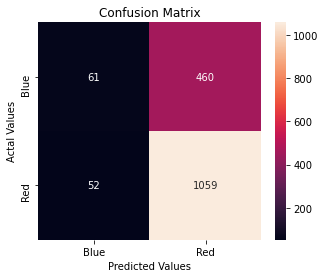

In [154]:
y_pred_class = best_random.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)

cm_df = pd.DataFrame(cm,
                     index = ['Blue','Red'], 
                     columns = ['Blue','Red'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = '.4g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Even more Red

## XGBoost

### Initial model

In [155]:
import xgboost as xgb
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)

model = xgb.XGBClassifier(use_label_encoder = False, random_state = 777, eval_metric = "logloss").fit(X_train, y_train_le)

In [156]:
y_pred = model.predict_proba(X_train)
log_loss(y_train_le, y_pred)

0.07776939009815582

In [157]:
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_le = le.transform(y_test)

y_pred = model.predict_proba(X_test)
log_loss(y_test_le, y_pred)

# Even worse performance and overfitting than the initial random forest model

0.671039968704124

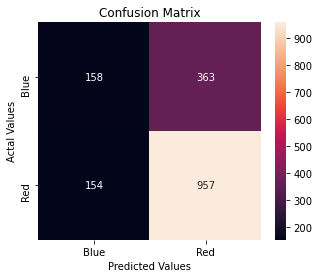

In [160]:
y_pred_class = model.predict(X_test)

cm = confusion_matrix(y_test_le, y_pred_class)

cm_df = pd.DataFrame(cm,
                     index = ['Blue','Red'], 
                     columns = ['Blue','Red'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = '.4g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Tuning

In [161]:
max_depth = range(3, 10, 2)
min_child_weight = range(1, 6, 2)
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
learning_rate = [1e-5, 1e-2, 0.1]
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'gamma': gamma,
               'subsample': subsample,
               'reg_alpha': reg_alpha,
               'learning_rate': learning_rate,
               'n_estimators': n_estimators
              }

pprint(random_grid)

{'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [1e-05, 0.01, 0.1],
 'max_depth': range(3, 10, 2),
 'min_child_weight': range(1, 6, 2),
 'n_estimators': [1000, 1250, 1500, 1750, 2000],
 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [162]:
# Use the random grid to search for best hyperparameters
xgboost = xgb.XGBClassifier(use_label_encoder = False, random_state = 777, eval_metric = "logloss")

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xgb_random = RandomizedSearchCV(estimator = xgboost, param_distributions = random_grid, n_iter = 100, cv = 3, 
                                verbose = 2, random_state = 777, n_jobs = 3)

# Fit the random search model
xgb_random.fit(X_train, y_train_le)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 24.8min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 73.7min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 127.1min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           v

In [163]:
xgb_random.best_params_

{'subsample': 0.8,
 'reg_alpha': 1,
 'n_estimators': 1000,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.01,
 'gamma': 0.3}

In [164]:
best_random = xgb_random.best_estimator_
y_pred = best_random.predict_proba(X_train)
y_pred

array([[0.49471462, 0.5052854 ],
       [0.11197174, 0.88802826],
       [0.35411137, 0.6458886 ],
       ...,
       [0.6187202 , 0.3812798 ],
       [0.21190584, 0.78809416],
       [0.39989376, 0.60010624]], dtype=float32)

In [165]:
log_loss(y_train_le, y_pred)

0.4680958364555385

In [166]:
y_pred = best_random.predict_proba(X_test)
y_pred

array([[0.44886053, 0.5511395 ],
       [0.2539754 , 0.7460246 ],
       [0.13814771, 0.8618523 ],
       ...,
       [0.19882035, 0.80117965],
       [0.4417315 , 0.5582685 ],
       [0.12442857, 0.8755714 ]], dtype=float32)

In [167]:
log_loss(y_test_le, y_pred)

# Best performing model, still see overfitting but much improved from initial xgboost and tuned random forest

0.5688530311933445

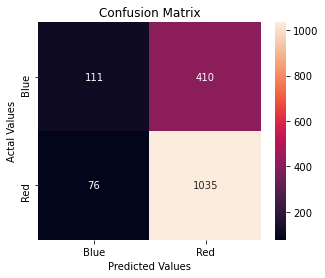

In [169]:
y_pred_class = best_random.predict(X_test)

cm = confusion_matrix(y_test_le, y_pred_class)

cm_df = pd.DataFrame(cm,
                     index = ['Blue','Red'], 
                     columns = ['Blue','Red'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = '.4g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# still choosing Red too often

## Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

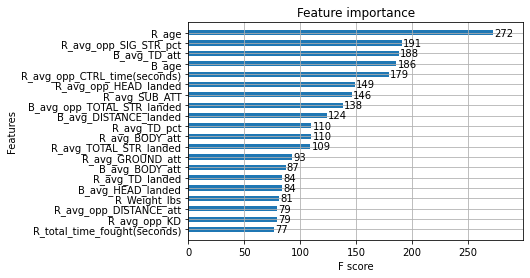

In [170]:
from xgboost import plot_importance
plot_importance(best_random, max_num_features = 20, height = 0.5)